In [1]:
import sys
import delivery_driver as dd
sys.path.append("../../deliveryrobot")
from utilities.utilities import *
import time

In [2]:
start_time = time.time()
robot = dd.DeliveryRobot()
print(f"Robot setup complete in {time.time()-start_time} seconds")

Robot setup complete in 0.9234707355499268 seconds


In [3]:
import matplotlib.pyplot as plt
import cv2
i=0

In [4]:
"""filename = f"calibration_{i}.jpg"
i += 1
filename = robot.take_picture(cal_dir, filename)
img = cv2.imread(filename)
plt.imshow(img)"""

'filename = f"calibration_{i}.jpg"\ni += 1\nfilename = robot.take_picture(cal_dir, filename)\nimg = cv2.imread(filename)\nplt.imshow(img)'

In [5]:
from sensors.camera.apriltagsensor import *
from sensors.calibration.camera_calibration import *


filename = "live_april"
start_time = time.time()
sensor = AprilTagSensor(cal_dir)
print(f"Sensor calibration and setup in {time.time()-start_time} seconds")
path = robot.take_picture(image_dir + "/testing/pose_test/")
measurements={}
start_time = time.time()
sensor.detect(path, measurements)
print(f"Sensor detections in {time.time()-start_time} seconds")
print(measurements)

AprilTag sensor setup COMPLETE
Sensor calibration and setup in 0.008153200149536133 seconds
Sensor detections in 0.2730281352996826 seconds
{'1': [2.1221127682904033, 0.03301323068478387, -0.019597008563547298], '4': [3.088720343102458, 1.3774345705060262, -0.2665554798079176], '5': [3.103872691502504, 1.3892653099533518, -0.22848367018906718], '6': [3.077845809294723, 1.086984079096966, -0.12697191804631094], '7': [3.0037082260009185, 1.06719728291709, -0.14993279323322015]}


In [6]:
sys.path.append("../../deliveryrobot")

from navigation.slam.onlineslam import *

slam = OnlineSLAM(3)
slam.debug = False
start_time = time.time()
slam.process_measurements(measurements)
slam.process_movement(0,0)
slam.map_update()
print(f"SLAM sequence in {time.time()-start_time} seconds")

SLAM sequence in 0.022675752639770508 seconds


In [7]:
from navigation.astar.astar import *
goal_state = measurements["1"]
goal_state[0] -= 0.4
obstacles = {}

scalar = 1
astar = Astar(
    beam_resolution=5,
    beam_range=np.pi/4,
    max_distance=0.2*scalar,
    heuristic_weight=1000/scalar,
    cost=1,
    fos=1,
    robot_radius_m=0.015*scalar
)
astar.debug = False
astar.verbose = False
robot_state = np.array([0.,0.,0.])

start_time = time.time()
astar_test = astar.astar_move(robot_state, obstacles, goal_state)
duration = time.time() - start_time
print(f"Results from Astar came in {duration} seconds and are:")
astar_test.print_info()

02:05:08 - - - - - - UPCOMING PATH:
 - - - - - - - - - - - - - - -

	NODE: 0
                                    	LOC: [0. 0. 0.]

	NODE: 6
                                    	LOC: [0.2 0.  0. ]

	NODE: 17
                                    	LOC: [0.4 0.  0. ]

	NODE: 28
                                    	LOC: [0.6 0.  0. ]

	NODE: 39
                                    	LOC: [0.8 0.  0. ]

	NODE: 50
                                    	LOC: [1. 0. 0.]

	NODE: 61
                                    	LOC: [1.2 0.  0. ]

	NODE: 72
                                    	LOC: [1.4 0.  0. ]

	NODE: 81
                                    	LOC: [ 1.5902113  -0.0618034  -0.31415927]

Results from Astar came in 0.12715744972229004 seconds and are:
Next:  INFO.NA
Distance (m):  0.2
Steering (rad):  0.0
Path:  [(0, array([0., 0., 0.])), (6, array([0.2, 0. , 0. ])), (17, array([0.4, 0. , 0. ])), (28, array([0.6, 0. , 0. ])), (39, array([0.8, 0. , 0. ])), (50, array([1., 0., 0.])), (61, array([1.

In [8]:
print(goal_state)

[1.722112768290402, 0.033013230684783346, -0.019597008563547798]


In [9]:
print(astar_test.path)

[(0, array([0., 0., 0.])), (6, array([0.2, 0. , 0. ])), (17, array([0.4, 0. , 0. ])), (28, array([0.6, 0. , 0. ])), (39, array([0.8, 0. , 0. ])), (50, array([1., 0., 0.])), (61, array([1.2, 0. , 0. ])), (72, array([1.4, 0. , 0. ])), (81, array([ 1.5902113 , -0.0618034 , -0.31415927]))]


In [10]:
from kinematics.movementai import *
import time
import math

1721700309.258619 steering [0.01 0.  ] 0.0
1721700309.3044095 steering [0.01 0.  ] 0.0
1721700309.3469346 steering [0.01 0.  ] 0.0
1721700309.3974886 steering [0.01 0.  ] 0.0
1721700309.4108663 steering [0.01 0.  ] 0.0
1721700309.4256792 steering [0.01 0.  ] 0.0
1721700309.4389796 steering [0.01 0.  ] 0.0
pause
1721700309.703779 steering [0.01 0.  ] 0.0
1721700309.7167692 steering [0.01 0.  ] 0.0
1721700309.7272089 steering [0.01 0.  ] 0.0
1721700309.7371404 steering [0.01 0.  ] 0.0
1721700309.7522616 steering [0.01 0.  ] 0.0
1721700309.760475 steering [0.01 0.  ] 0.0
1721700309.7697296 steering [0.01 0.  ] 0.0
pause
1721700310.031208 steering [0.01 0.  ] 0.0
1721700310.0439024 steering [0.01 0.  ] 0.0
1721700310.0562148 steering [0.01 0.  ] 0.0
1721700310.0657277 steering [0.01 0.  ] 0.0
1721700310.0781422 steering [0.01 0.  ] 0.0
1721700310.0897899 steering [0.01 0.  ] 0.0
1721700310.097683 steering [0.01 0.  ] 0.0
pause
1721700310.3579028 steering [0.01 0.  ] 0.0
1721700310.3673158 

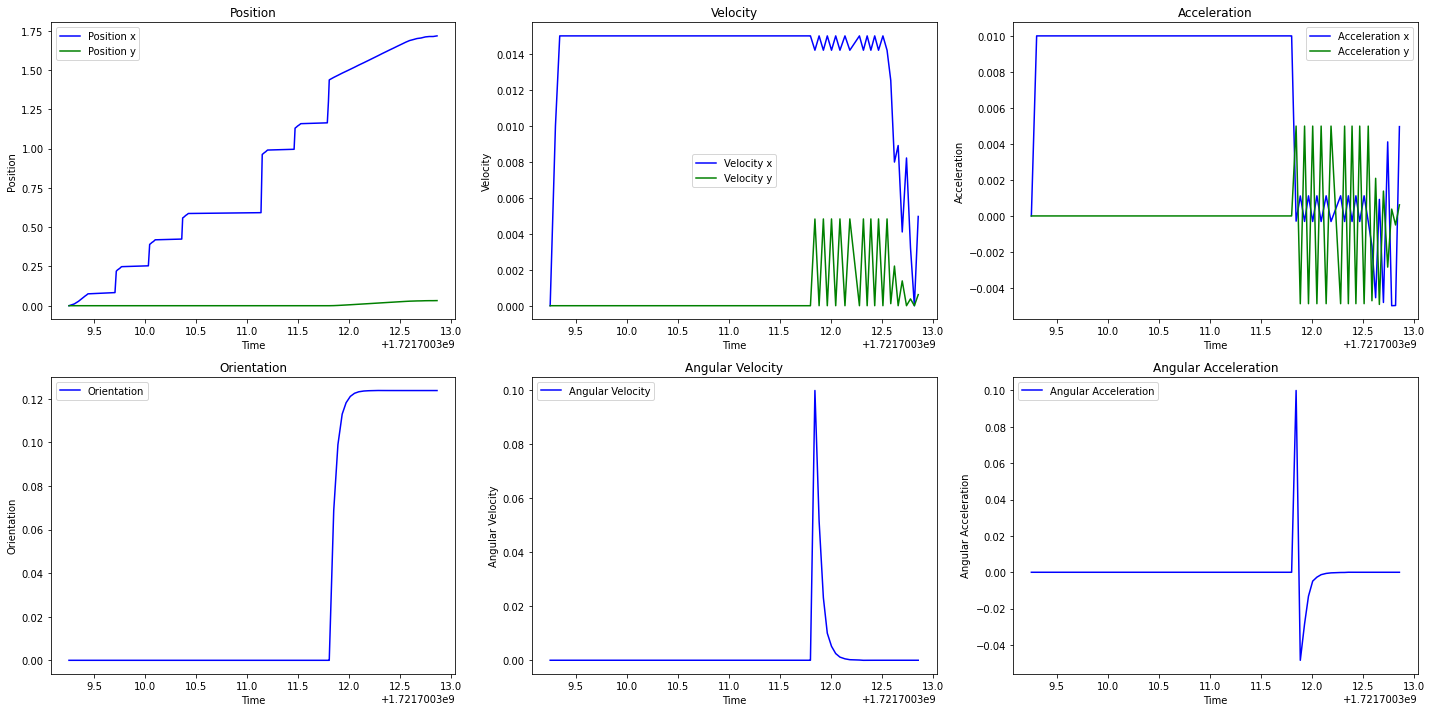

In [11]:
robot.update_path_ai(astar_test.path)

# setup time variables
goal_time = 1
call_time = 0
total_time = 0
start_time = time.time()
last_call = time.time()
n = 0
m = 0
thresh = 2

while robot.path_follow_ai(goal_time, call_time):
    
    # get time it took to make the call
    last_call = time.time()
    call_time = last_call - start_time
    total_time+=call_time
    
    # set a new start time
    start_time = time.time()
    
    if n > 5:
        if m > thresh:
            time.sleep(0.45)
            print("long pause")
            m = 0
            thresh += 1
        print("pause")
        time.sleep(0.25)
        n = 0
        m += 1
    else:
        n += 1
    
    
    if total_time > 4:
        robot.robot.stop()
        
        break

robot.target_ai.slam_update(goal_state)
print(f"targeting {goal_state} from {robot.robot_ai.position}")

while robot.arrive_ai(goal_time, call_time):
    
    # get time it took to make the call
    last_call = time.time()
    call_time = last_call - start_time
    total_time+=call_time
    
    # set a new start time
    start_time = time.time()
    
    if total_time > 4:
        robot.robot.stop()
        break

robot.robot.stop()
robot.robot_ai.kplot.plot_data()